R2 score : 
Train accuracy -219.91%
Test accuracy -198.32%


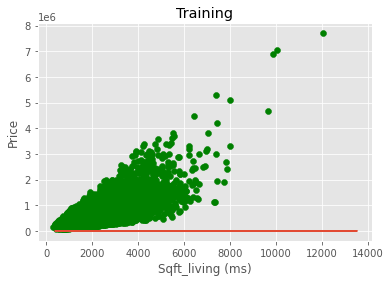

In [29]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('kc_house_data.csv')
#df
x = df.sqft_living.values
y = df.price.values

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

sx = StandardScaler()
sy = StandardScaler()
x_train_std = sx.fit_transform(x_train)
x_test_std = sx.transform(x_test)
y_train_std = sy.fit_transform(y_train.reshape(-1,1))

lr = LinearRegression()
lr.fit(x_train_std,y_train_std)
y_pred = lr.predict(x_test_std)
print("R2 score : ")
r2_score(y_test,sy.inverse_transform(y_pred.reshape(-1,1)))


print(f'Train accuracy {round(lr.score(x_train,y_train)*100, 6)}%')
print(f'Test accuracy {round(lr.score(x_test,y_test)*100, 6)}%')

plt.scatter(x_train, y_train, color="green")
plt.plot(x_test, y_pred)
plt.xlabel("Sqft_living (ms)")
plt.ylabel("Price")
plt.title('Training')
plt.show()

